In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Description:
Developed a real-time anomaly detection system using machine learning to identify potentially fraudulent transactions in financial datasets.

Key Features:

Leveraged unsupervised learning algorithms (Isolation Forest, One-Class SVM) to detect anomalies without labeled data.

Designed a scalable pipeline for streaming transaction data and processing it in near real-time.

Integrated statistical techniques and feature engineering to improve detection accuracy.

Visualized anomaly patterns and alert thresholds using interactive dashboards (e.g., Plotly or Power BI).

Tech Stack:
Python, scikit-learn, Pandas, NumPy, Streamlit, Plotly, AWS S3

Step 2: Load the Dataset

In [6]:
import pandas as pd

# Load data
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Step 3: Explore & Preprocess Data

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


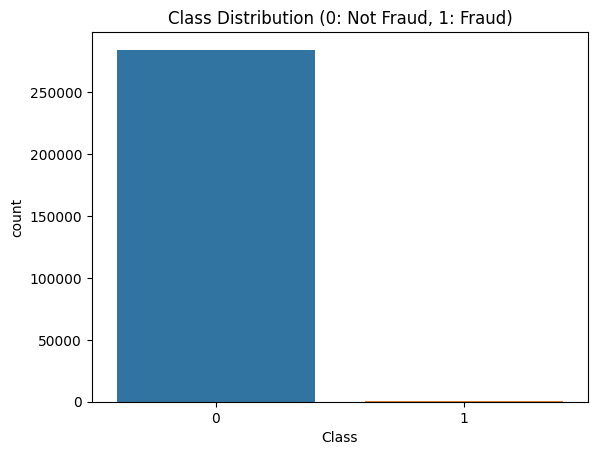

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
print(df.isnull().sum())

# Class distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0: Not Fraud, 1: Fraud)")
plt.show()

# Log-transform skewed feature (Amount)
df['Amount_log'] = np.log1p(df['Amount'])

# Drop Time column if not needed
df = df.drop(['Time'], axis=1)


Step 4: Train Isolation Forest Model

In [8]:
from sklearn.ensemble import IsolationForest

# Use only features for IsolationForest (no label)
X = df.drop(['Class'], axis=1)

model = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)
model.fit(X)

# Predictions
df['anomaly_score'] = model.decision_function(X)
df['anomaly'] = model.predict(X)

# Convert anomaly from [-1, 1] to [1, 0] to match fraud label
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Step 5: Evaluation

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

# Compare predictions with actual Class
print(confusion_matrix(df['Class'], df['anomaly']))
print(classification_report(df['Class'], df['anomaly']))


[[284126    189]
 [   396     96]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.20      0.25       492

    accuracy                           1.00    284807
   macro avg       0.67      0.60      0.62    284807
weighted avg       1.00      1.00      1.00    284807



Step 6: Visualize Anomaly Scores

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


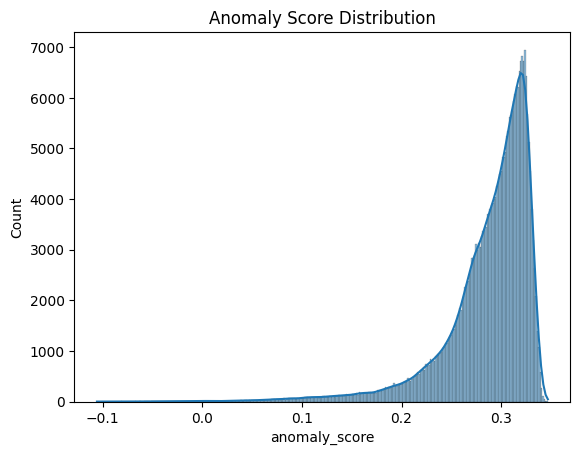

In [10]:
sns.histplot(df['anomaly_score'], kde=True)
plt.title('Anomaly Score Distribution')
plt.show()


Step 7: Save Results (for local development)
In Kaggle you don’t need to save files unless downloading:

In [12]:
fraud_cases = df[df['anomaly'] == 1]
fraud_cases.to_csv('fraud_cases_detected.csv', index=False)


Summary:
Objective: Detect fraudulent credit card transactions.

Input Data: Kaggle Credit Card Fraud Dataset with PCA-transformed features, amount, and class labels.

Approach: Anomaly detection using Isolation Forest to separate legitimate transactions from fraudulent ones.